In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
import fp_utils

In [3]:
fp_utils.settings.init_fp_utils()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [4]:
data_dir = Path('../data')

In [5]:
df = fp_utils.data_io.DataFrameLoader.pickle(data_dir / '1e5.pickle')
df.shape

(100000, 2575)

# Minimally correlating columns + BF

In [6]:
min_cor_cols = np.load(str(data_dir / 'cols.npy'))

In [7]:
min_cor_cols[:10]

array([ 883,  489,   94, 1585, 1556, 1576,  832,  295,  919, 1345])

In [8]:
from fp_utils.finders import BFDriveFinder, SubColsFinder

In [9]:
bfd_finder = BFDriveFinder(df, data_dir / 'bf_data')

1.344s -- BFDriveFinder init time


In [58]:
class MCC10(SubColsFinder):
    COLUMNS = min_cor_cols[:10]
    
class MCC50(SubColsFinder):
    COLUMNS = min_cor_cols[:50]
    
class MCC100(SubColsFinder):
    COLUMNS = min_cor_cols[:100]
    
class MCC500(SubColsFinder):
    COLUMNS = min_cor_cols[:500]
    
class MCC1000(SubColsFinder):
    COLUMNS = min_cor_cols[:1000]

In [11]:
mcc10 = MCC10(df, BFDriveFinder, data_dir / 'mcc10')

0.026s -- BFDriveFinder init time
1.075s -- MCC10 init time


In [12]:
mcc50 = MCC50(df, BFDriveFinder, data_dir / 'mcc50')

0.046s -- BFDriveFinder init time
1.062s -- MCC50 init time


In [13]:
mcc100 = MCC100(df, BFDriveFinder, data_dir / 'mcc100')

0.077s -- BFDriveFinder init time
0.936s -- MCC100 init time


In [14]:
mcc500 = MCC500(df, BFDriveFinder, data_dir / 'mcc500')

0.324s -- BFDriveFinder init time
1.465s -- MCC500 init time


In [15]:
mcc1000 = MCC1000(df, BFDriveFinder, data_dir / 'mcc1000')

0.542s -- BFDriveFinder init time
2.230s -- MCC1000 init time


In [16]:
from fp_utils.tests import FinderCorrectnessTester, FinderSpeedTester

In [17]:
checker = FinderCorrectnessTester(bfd_finder, [mcc10, mcc50, mcc100, mcc500, mcc1000])

In [18]:
tests = df.sample(20)

In [ ]:
%%time
checker.test_all(tests, verbose=True)

In [19]:
speed_tester = FinderSpeedTester([bfd_finder, mcc10, mcc50, mcc100, mcc500, mcc1000])

In [20]:
stat = speed_tester.test_all(tests, verbose=True)

-----
Test #000
1.884s -- BFDriveFinder
1.143s -- MCC10
0.339s -- MCC50
0.372s -- MCC100
0.626s -- MCC500
0.897s -- MCC1000
-----
Test #001
1.210s -- BFDriveFinder
4.817s -- MCC10
0.318s -- MCC50
0.322s -- MCC100
0.470s -- MCC500
0.618s -- MCC1000
-----
Test #002
1.100s -- BFDriveFinder
0.442s -- MCC10
0.305s -- MCC50
0.321s -- MCC100
0.508s -- MCC500
0.626s -- MCC1000
-----
Test #003
1.079s -- BFDriveFinder
0.372s -- MCC10
0.309s -- MCC50
0.323s -- MCC100
0.461s -- MCC500
0.617s -- MCC1000
-----
Test #004
1.052s -- BFDriveFinder
0.452s -- MCC10
0.338s -- MCC50
0.335s -- MCC100
0.464s -- MCC500
0.630s -- MCC1000
-----
Test #005
1.034s -- BFDriveFinder
4.730s -- MCC10
0.306s -- MCC50
0.321s -- MCC100
0.458s -- MCC500
0.618s -- MCC1000
-----
Test #006
1.071s -- BFDriveFinder
1.083s -- MCC10
0.320s -- MCC50
0.326s -- MCC100
0.462s -- MCC500
0.610s -- MCC1000
-----
Test #007
1.035s -- BFDriveFinder
0.435s -- MCC10
0.308s -- MCC50
0.320s -- MCC100
0.456s -- MCC500
0.610s -- MCC1000
-----
Te

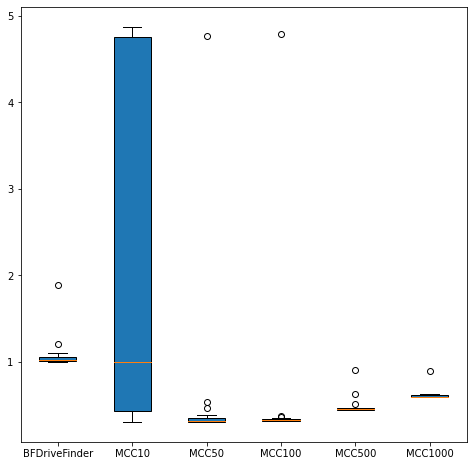

In [21]:
stat.as_boxplot()

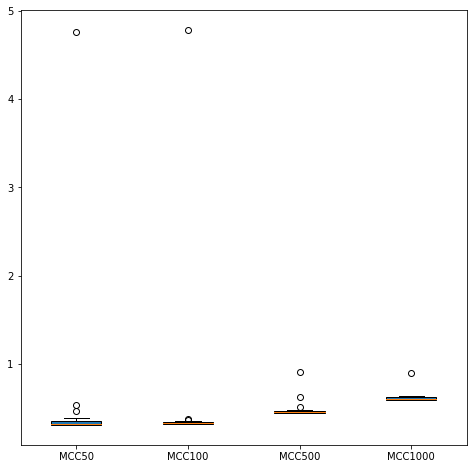

In [22]:
stat.drop([bfd_finder, MCC10]).as_boxplot()

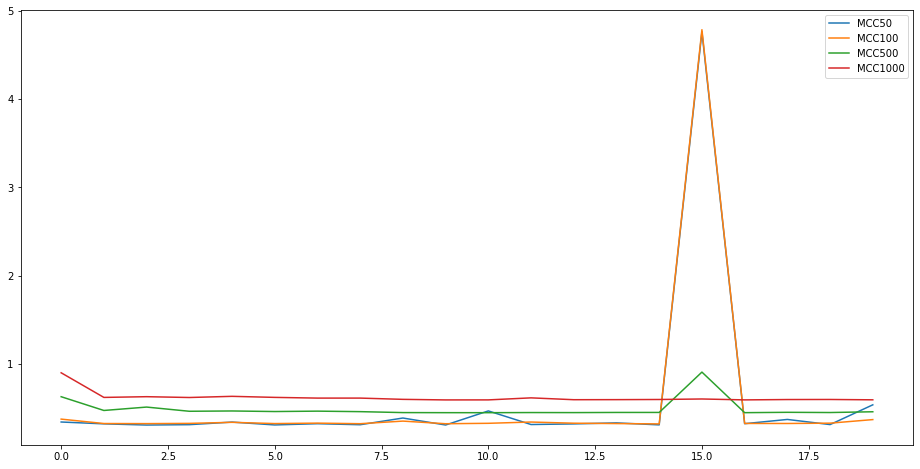

In [23]:
stat.drop([bfd_finder, MCC10]).as_plot()

In [24]:
class MCC20(SubColsFinder):
    COLUMNS = min_cor_cols[:20]
    
class MCC30(SubColsFinder):
    COLUMNS = min_cor_cols[:30]
    
class MCC40(SubColsFinder):
    COLUMNS = min_cor_cols[:40]

In [25]:
mcc20 = MCC20(df,BFDriveFinder, data_dir / 'mcc20')

0.034s -- BFDriveFinder init time
1.341s -- MCC20 init time


In [26]:
mcc30 = MCC30(df, BFDriveFinder, data_dir / 'mcc30')

0.039s -- BFDriveFinder init time
1.573s -- MCC30 init time


In [27]:
mcc40 = MCC40(df, BFDriveFinder, data_dir / 'mcc40')

0.046s -- BFDriveFinder init time
1.585s -- MCC40 init time


In [28]:
speed_tester = FinderSpeedTester([mcc20, mcc30, mcc40])

In [29]:
stat2 = speed_tester.test_all(tests, verbose=True)

-----
Test #000
1.044s -- MCC20
0.471s -- MCC30
0.351s -- MCC40
-----
Test #001
0.544s -- MCC20
0.323s -- MCC30
0.302s -- MCC40
-----
Test #002
0.324s -- MCC20
0.297s -- MCC30
0.294s -- MCC40
-----
Test #003
0.367s -- MCC20
0.302s -- MCC30
0.298s -- MCC40
-----
Test #004
0.458s -- MCC20
0.463s -- MCC30
0.326s -- MCC40
-----
Test #005
0.374s -- MCC20
0.315s -- MCC30
0.303s -- MCC40
-----
Test #006
0.316s -- MCC20
0.310s -- MCC30
0.308s -- MCC40
-----
Test #007
0.333s -- MCC20
0.319s -- MCC30
0.310s -- MCC40
-----
Test #008
0.319s -- MCC20
0.308s -- MCC30
0.308s -- MCC40
-----
Test #009
0.302s -- MCC20
0.311s -- MCC30
0.302s -- MCC40
-----
Test #010
0.460s -- MCC20
0.463s -- MCC30
0.472s -- MCC40
-----
Test #011
0.335s -- MCC20
0.319s -- MCC30
0.316s -- MCC40
-----
Test #012
1.032s -- MCC20
0.340s -- MCC30
0.324s -- MCC40
-----
Test #013
4.870s -- MCC20
0.537s -- MCC30
0.329s -- MCC40
-----
Test #014
0.534s -- MCC20
0.321s -- MCC30
0.316s -- MCC40
-----
Test #015
4.869s -- MCC20
4.877s -

In [36]:
stat3 = stat.take([mcc10]) + stat2 + stat.take([mcc50])

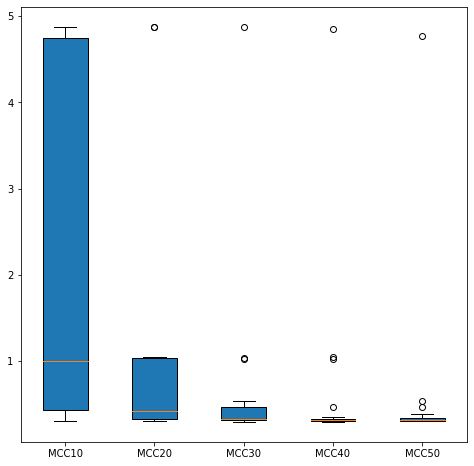

In [111]:
stat3.as_boxplot()

In [112]:
stat3

MCC10:
	0.309 -- min
	4.873 -- max
	2.064 -- mean
	0.997 -- median
MCC20:
	0.302 -- min
	4.870 -- max
	0.961 -- mean
	0.416 -- median
MCC30:
	0.297 -- min
	4.877 -- max
	0.651 -- mean
	0.324 -- median
MCC40:
	0.294 -- min
	4.845 -- max
	0.621 -- mean
	0.317 -- median
MCC50:
	0.305 -- min
	4.766 -- max
	0.563 -- mean
	0.319 -- median

# Minimally correlating columns + SplitTree

In [38]:
from fp_utils.finders import SplitterTreeFinder

In [39]:
tree = SplitterTreeFinder(df, data_dir / 'splitter_tree')

29.868s -- SplitterTreeFinder init time


In [47]:
class Tree(SplitterTreeFinder):
    BUCKET_SIZE = 10000
    MAX_DEPTH = 5

In [49]:
mcc10 = MCC10(df, Tree, data_dir / 'mcc10')

IndexError: index 0 is out of bounds for axis 0 with size 0

# Ivan's columns + SplitTree

In [54]:
iv_cols = df.mean().apply(lambda p: p * (1 - p) / (1 - p + p * p)).sort_values(ascending=False)

In [55]:
iv_cols

1510    0.333333
3197    0.333333
3403    0.333333
3026    0.333333
1212    0.333333
          ...   
3016    0.001940
3166    0.001940
3385    0.001940
2871    0.000000
3654    0.000000
Length: 2575, dtype: float64

In [91]:
class Tree(SplitterTreeFinder):
    BUCKET_SIZE = 5000
    MAX_DEPTH = 8

In [92]:
class IC10(SubColsFinder):
    COLUMNS = iv_cols.index[:10]
    
class IC50(SubColsFinder):
    COLUMNS = iv_cols.index[:50]
    
class IC100(SubColsFinder):
    COLUMNS = iv_cols.index[:100]
    
class IC500(SubColsFinder):
    COLUMNS = iv_cols.index[:500]
    
class IC1000(SubColsFinder):
    COLUMNS = iv_cols.index[:1000]

In [93]:
ic100 = IC100(df, Tree, data_dir / 'ic100')

1.453s -- SplitterTreeFinder init time
2.552s -- IC100 init time


In [94]:
ic500 = IC500(df, Tree, data_dir / 'ic500')

4.471s -- SplitterTreeFinder init time
5.774s -- IC500 init time


In [95]:
ic1000 = IC1000(df, Tree, data_dir / 'ic1000')

14.353s -- SplitterTreeFinder init time
16.198s -- IC1000 init time


In [96]:
checker = FinderCorrectnessTester(bfd_finder, [ic100, ic500, ic1000])

In [97]:
checker.test_random(df, 5, verbose=True)

-----
Test #000
OK -- IC100
OK -- IC500
OK -- IC1000
-----
Test #001
OK -- IC100
OK -- IC500
OK -- IC1000
-----
Test #002
OK -- IC100
OK -- IC500
OK -- IC1000
-----
Test #003
OK -- IC100
OK -- IC500
OK -- IC1000
-----
Test #004
OK -- IC100
OK -- IC500
OK -- IC1000
-----


array([ True,  True,  True])

In [98]:
speed_tester = FinderSpeedTester([ic100, ic500, ic1000])

In [116]:
tests = df.sample(50)

In [117]:
stat4 = speed_tester.test_all(tests, verbose=True)

-----
Test #000
0.126s -- IC100
0.252s -- IC500
0.604s -- IC1000
-----
Test #001
0.068s -- IC100
0.049s -- IC500
0.062s -- IC1000
-----
Test #002
0.018s -- IC100
0.046s -- IC500
0.059s -- IC1000
-----
Test #003
0.005s -- IC100
0.015s -- IC500
0.027s -- IC1000
-----
Test #004
0.033s -- IC100
0.070s -- IC500
0.140s -- IC1000
-----
Test #005
0.019s -- IC100
0.095s -- IC500
0.114s -- IC1000
-----
Test #006
0.013s -- IC100
0.060s -- IC500
0.107s -- IC1000
-----
Test #007
0.060s -- IC100
0.172s -- IC500
0.217s -- IC1000
-----
Test #008
0.107s -- IC100
0.195s -- IC500
0.347s -- IC1000
-----
Test #009
0.037s -- IC100
0.118s -- IC500
0.253s -- IC1000
-----
Test #010
0.937s -- IC100
0.322s -- IC500
0.415s -- IC1000
-----
Test #011
0.018s -- IC100
0.116s -- IC500
0.082s -- IC1000
-----
Test #012
0.045s -- IC100
0.062s -- IC500
0.193s -- IC1000
-----
Test #013
0.021s -- IC100
0.073s -- IC500
0.135s -- IC1000
-----
Test #014
0.048s -- IC100
0.086s -- IC500
0.104s -- IC1000
-----
Test #015
0.012s --

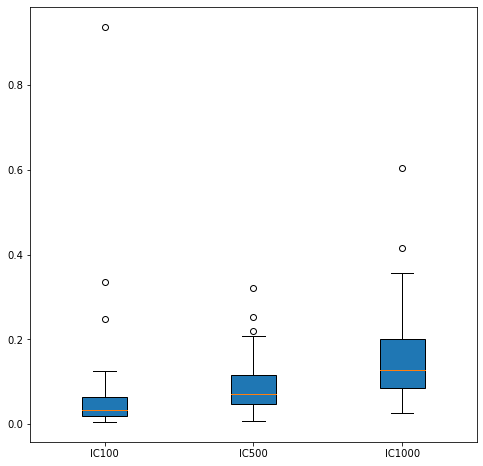

In [118]:
stat4.as_boxplot()

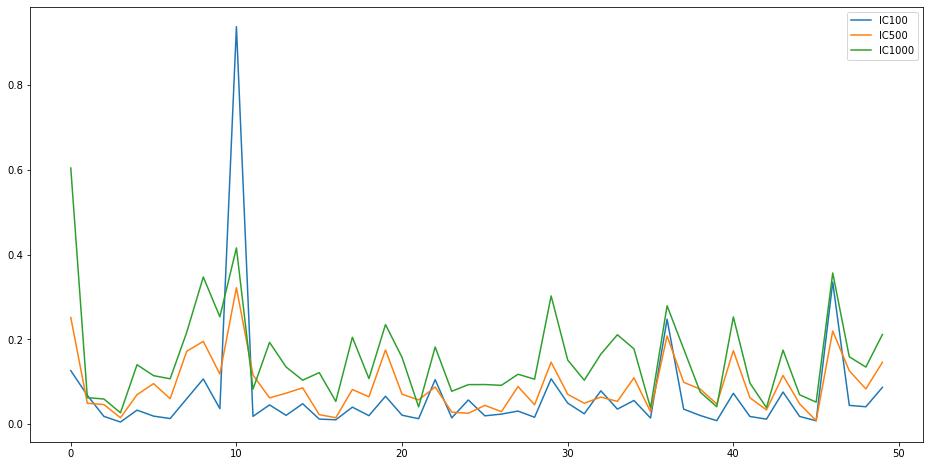

In [119]:
stat4.as_plot()

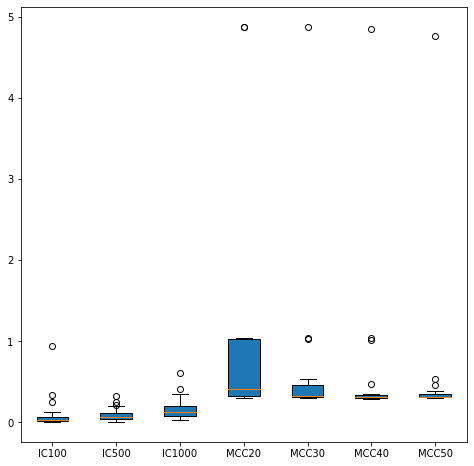

In [138]:
(stat4 + stat3.drop([mcc10])).as_boxplot()

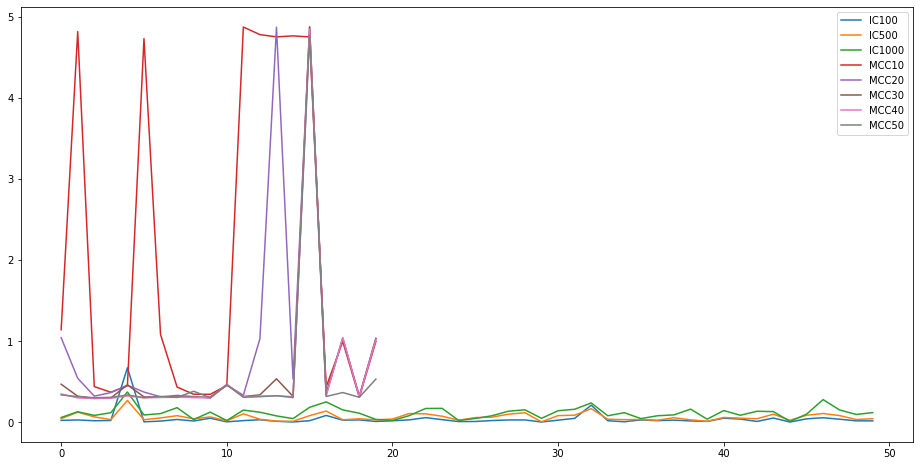

In [115]:
(stat4 + stat3).as_plot()